**Importando as bibliotecas**

In [1]:
!pip install plotly==4.5.4

  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


ERROR: pycaret 1.0.0 requires pandas-profiling==2.3.0, which is not installed.
ERROR: pycaret 1.0.0 has requirement plotly==4.4.1, but you'll have plotly 4.5.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import plotly.graph_objects as go

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in c:\users\ftspu\anaconda3\lib\site-packages (0.1.54)


***Obtendo os dados***

In [3]:
ibov = web.get_data_yahoo("^BVSP")

[*********************100%***********************]  1 of 1 completed


In [4]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-05,78887.000000,81066.00,78886.00,79471.000000,79471.000000,9154700
2020-05-06,79473.000000,79996.00,78056.00,79064.000000,79064.000000,9775900
2020-05-07,79072.000000,80061.00,78061.00,78119.000000,78119.000000,13808900
2020-05-08,78152.000000,80557.00,78152.00,80263.000000,80263.000000,10734400
2020-05-11,80263.421875,80722.75,78993.75,79186.070312,79186.070312,0


In [5]:
ibov = ibov.reset_index()

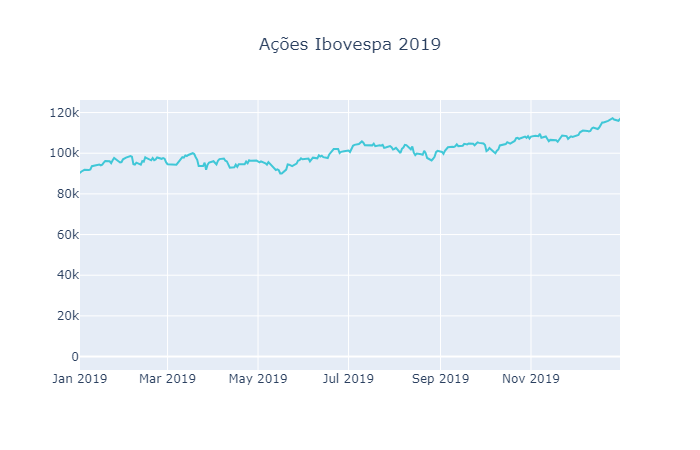

In [7]:
#Gráfico do fechamento das ações em 2019
fig = go.Figure()
fig.add_trace( go.Scatter(
                x=ibov.Date,
                y=ibov.Close,
                name = "Ibovespa Close",
                line = dict(color = '#17BECF'),
                opacity = 0.8)
)


layout = fig.update_layout(dict(
    title = "Ações Ibovespa 2019",
    title_x= 0.5,
    xaxis =dict(
        range = ['2019-01-01','2019-12-31'])
))

fig.show("png")

###***Gráfico com botões onde podemos escolher analisar todos os meses, os 6 últimos meses ou o mês anterior.***###

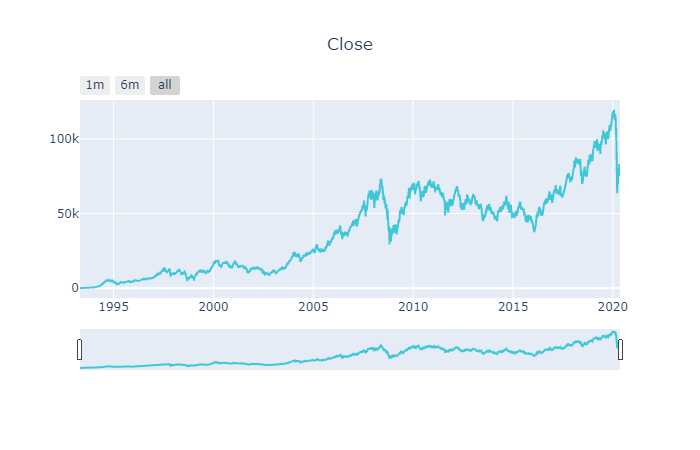

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=ibov.Date,
        y=ibov.Close,
        name = "Ibovespa close",
        line = dict(color = '#17BECF'),
        opacity = 0.8)
)


layout = fig.update_layout(dict(
        title="Close",
        title_x=0.5,
        xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
))

fig.show("png")

##***Gráfico de Candlestick, onde podemos analisar a oscilação entre a abertura e o fechamento, e se a ação fechou maior ou menor que o preço de abertura, para isso só analisar pela cor, os vermelhos fecharam com o preço menor do que o de abertura e os verdes fecharam com o preço maior do que o de abertura.***##

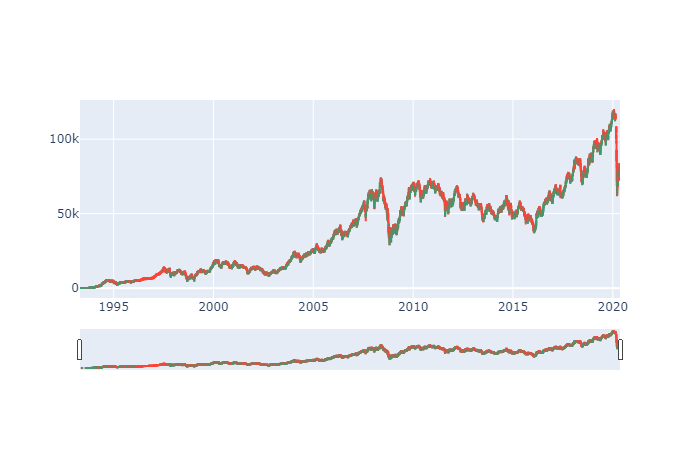

In [9]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=ibov['Date'],
                open=ibov['Open'],
                high=ibov['High'],
                low=ibov['Low'],
                close=ibov['Close']))

fig.show("png")

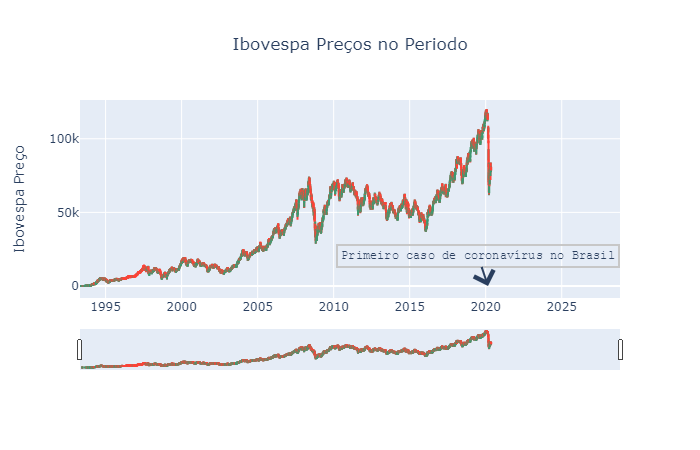

In [10]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=ibov['Date'],
                open=ibov['Open'],
                high=ibov['High'],
                low=ibov['Low'],
                close=ibov['Close']))


layout = fig.update_layout({
    'title': 'Ibovespa Preços no Periodo',
    'title_x': 0.5,
    'yaxis': {'title': 'Ibovespa Preço'},
    'annotations': [{
        'x': '2020-02-26', 
        'y': 15, 
        'xref': 'x', 
        'yref': 'y',
        'showarrow': True,
        'font':dict(
            family="Courier New, monospace",
            size=12
        ),
        'text': 'Primeiro caso de coronavírus no Brasil',
        'align':"center",
        'arrowhead':4,
        'arrowsize':2,
        'arrowwidth':2,
        'bordercolor':"#c7c7c7",
        'borderwidth':2,
        'borderpad':3
    }]
}
)
        
fig.show("png")

###***Trabalhando com Médias***###

In [11]:
# Cria coluna com média 3
ibov['MM_3'] = ibov.Close.rolling(window=3).mean()

# Cria coluna com média 7
ibov['MM_7'] = ibov.Close.rolling(window=7).mean()

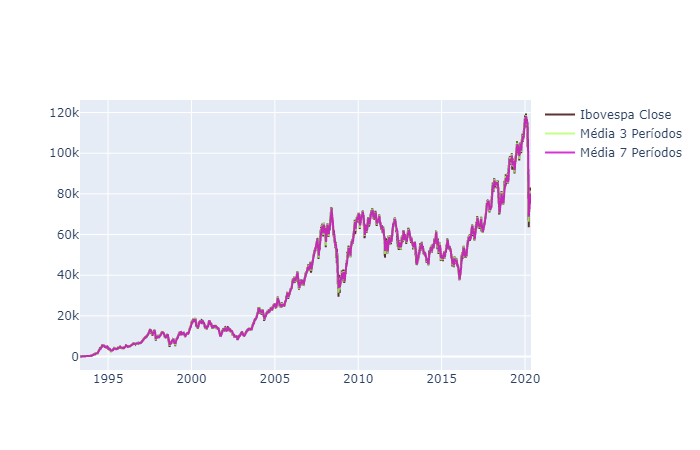

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=ibov.Date,
                y=ibov.Close,
                name = "Ibovespa Close",
                line = dict(color = '#330000'),
                opacity = 0.8))

fig.add_trace(go.Scatter(
                x=ibov.Date,
                y=ibov['MM_3'],
                name = "Média 3 Períodos",
                line = dict(color = '#B2FF66'),
                opacity = 0.8))

fig.add_trace(go.Scatter(
                x=ibov.Date,
                y=ibov['MM_7'],
                name = "Média 7 Períodos",
                line = dict(color = '#CC00CC'),
                opacity = 0.8))



fig.show("png")

###***Trabalhando apenas com os dados de 2020***###

In [13]:
ibov_2020 = ibov.loc[ibov["Date"].dt.year == 2020]

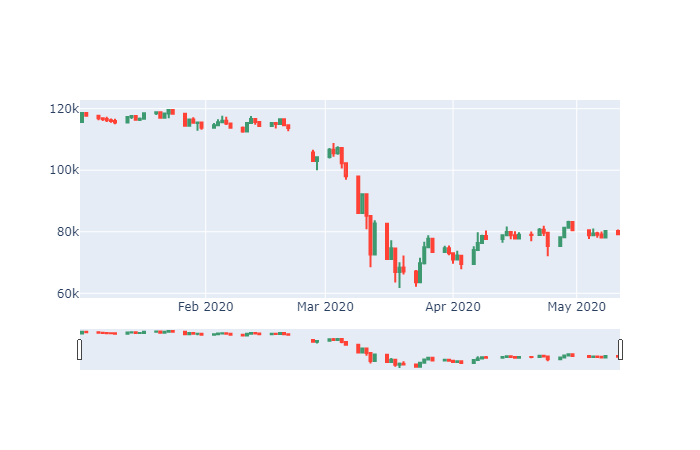

In [14]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=ibov_2020['Date'],
                open=ibov_2020['Open'],
                high=ibov_2020['High'],
                low=ibov_2020['Low'],
                close=ibov_2020['Close']))

fig.show("png")

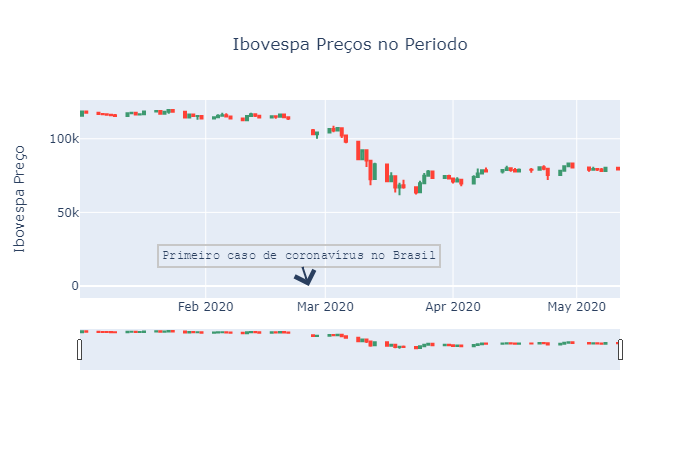

In [15]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=ibov_2020['Date'],
                open=ibov_2020['Open'],
                high=ibov_2020['High'],
                low=ibov_2020['Low'],
                close=ibov_2020['Close']))


layout = fig.update_layout({
    'title': 'Ibovespa Preços no Periodo',
    'title_x': 0.5,
    'yaxis': {'title': 'Ibovespa Preço'},
    'annotations': [{
        'x': '2020-02-26', 
        'y': 15, 
        'xref': 'x', 
        'yref': 'y',
        'showarrow': True,
        'font':dict(
            family="Courier New, monospace",
            size=12
        ),
        'text': 'Primeiro caso de coronavírus no Brasil',
        'align':"center",
        'arrowhead':4,
        'arrowsize':2,
        'arrowwidth':2,
        'bordercolor':"#c7c7c7",
        'borderwidth':2,
        'borderpad':3
    }]
}
)
        
fig.show("png")